In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = np.genfromtxt("../logs/20231013212001_arlog.csv", delimiter=',', skip_header=1, usecols=(0, 1, 2, 3, 4, 5, 6), dtype=None, encoding='utf-8')


In [3]:
data2 = np.genfromtxt("../logs/20231013211956_patlog.csv", delimiter=',', skip_header=1, usecols=(0, 1), dtype=[int, '|U10'], converters={1: lambda x: 'S' if x.strip() == 'Spinning' else 'P'})


In [5]:
rostime1 = [row[3] for row in data1]  # Access strings directly
rostime2 = [row[0] for row in data2]  # Access strings directly


In [7]:
# Remove spaces from 'rostime' values
rostime1 = [row[3] for row in data1]
rostime2 = [str(row[0]).replace(" ", "") for row in data2]


In [8]:
state = [row[6] for row in data1]
random_no = [row[5] for row in data1]
behave_val = [row[4] for row in data1]
behavior = [''] * len(rostime1)  # Ensure behavior list matches the length of rostime1
ID = [row[0] for row in data1]

In [9]:
# Update behavior based on available data
for i, row in enumerate(data2):
    if len(row) > 1:
        if i < len(behavior):
            behavior[i] = row[1]

In [10]:
# Determine which 'Ros Time' array to use based on the longer one
if len(rostime1) >= len(rostime2):
    rostime = rostime1[:len(rostime2)]
else:
    rostime = rostime2[:len(rostime1)]

In [13]:
# Convert 'rostime' to datetime objects for better x-axis representation
import datetime
rostime = [datetime.datetime.strptime(''.join(rt.split()), "%H:%M:%S") for rt in rostime]


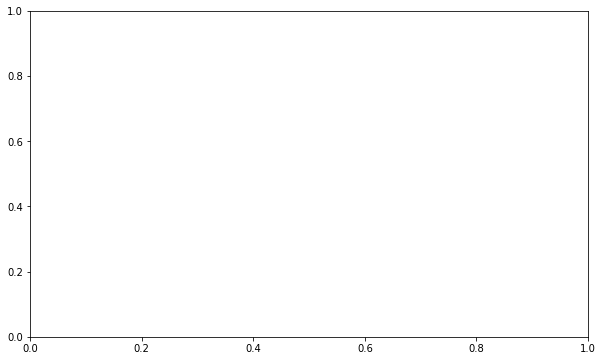

In [14]:
# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

In [16]:
# Slice the arrays to have the same length (e.g., first 16 elements)
rostime = rostime[:16]
ID = ID[:16]

# Plot the data
ax1.plot(rostime, ID, color='black', marker='o', label='ID', zorder=5)
for i, txt in enumerate(ID):
    ax1.annotate(txt, (rostime[i], ID[i]), textcoords="offset points", xytext=(0, 5), ha='center')


In [18]:
# Slice the arrays to have the same length (e.g., first 16 elements)
rostime = rostime[:16]
state = state[:16]

# Plot the data
ax2.plot(rostime, state, color='green', label='State')
ax2.set_yticks([1, 2])
ax2.set_yticklabels(state_labels[:2])


[Text(1, 1, 'Explore'), Text(1, 2, 'Patrol')]

In [20]:
# Plot Behavior on the left-hand side y-axis as dots with "S" or "P" labels
behavior_labels = ['S' if b == 'Spinning' else 'P' for b in behavior]
for i in range(min(len(rostime), len(behavior_labels))):
    ax1.annotate(behavior_labels[i], (rostime[i], 0), textcoords="offset points", xytext=(0, 5), ha='center', color='red')


In [22]:
# Slice the arrays to have the same length (e.g., first 16 elements)
rostime = rostime[:16]
random_no = random_no[:16]

# Plot the data
ax1.plot(rostime, random_no, color='blue', label='Random No')


In [25]:
# Slice the arrays to have the same length (e.g., first 16 elements)
rostime = rostime[:16]
behave_val = behave_val[:16]

# Plot the data
ax1.plot(rostime, behave_val, color='purple', label='Behave Val')


In [26]:
# Set the labels for the left and right y-axes
ax1.set_ylabel('Random No / Behave Val')
ax2.set_ylabel('State (Patrol/Explore)')

Text(0, 0.5, 'State (Patrol/Explore)')

In [27]:
# Set the title and legend
ax1.set_title('Data Over Time')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


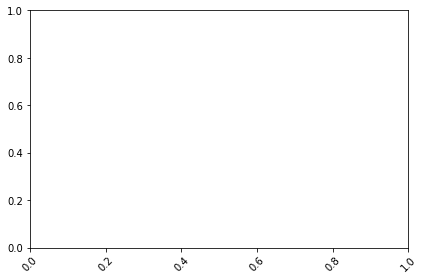

In [28]:
# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()